In [1]:
from os import listdir
from shutil import copyfile
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np

In [2]:
#changing folder's name to the one which has .csv files
mypath="C:\\Users\\nilu1\\Desktop\\Code\\AndroidPattern\\Data\\Test\\Gyro\\"
newpath="C:\\Users\\nilu1\\Desktop\\Code\\AndroidPattern\\Data\\Spike\\Gyro\\"
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles=[]
temp = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# files=["a29c08","66b325","b56522"]
files=["4b0c10"]
for i in range(len(temp)):
    st=temp[i]
    if(temp[i][:6] in files):
        onlyfiles.append(temp[i])
# print(onlyfiles)

# dashed=["Dataset 5.csv","Dataset 6.csv","Dataset 7.csv","Dataset 8.csv"]
# use=[onlyfiles[0]]
use=onlyfiles[:2]
print(len(onlyfiles))

40


4b0c10-04-2020_100537_PM61125&1223.csv 1059.0 -66.0 98
4b0c10-04-2020_100539_PM4697&804.csv 672.0 -25.0 107
4b0c10-04-2020_100541_PM3635&758.csv 744.0 109.0 123
4b0c10-04-2020_100543_PM7778&885.csv 754.0 -24.0 107
4b0c10-04-2020_100545_PM4753&851.csv 786.0 33.0 98
4b0c10-04-2020_100547_PM41053&1157.csv 965.0 -88.0 104
4b0c10-04-2020_100549_PM4906&1022.csv 817.0 -89.0 116
4b0c10-04-2020_100551_PM6719&826.csv 680.0 -39.0 107
4b0c10-04-2020_100553_PM6906&1013.csv 930.0 24.0 107
4b0c10-04-2020_100555_PM6762&848.csv 804.0 42.0 86
4b0c10-04-2020_100557_PM0766&941.csv 790.0 24.0 175
4b0c10-04-2020_100559_PM2752&857.csv 788.0 36.0 105
4b0c10-04-2020_100601_PM7747&892.csv 885.0 138.0 145
4b0c10-04-2020_100603_PM0720&805.csv 756.0 36.0 85
4b0c10-04-2020_100605_PM7695&790.csv 916.0 221.0 95
4b0c10-04-2020_100607_PM5754&873.csv 806.0 52.0 119
4b0c10-04-2020_100609_PM9662&775.csv 682.0 20.0 113
4b0c10-04-2020_100610_PM2689&756.csv 687.0 -2.0 67
4b0c10-04-2020_100612_PM2795&888.csv 716.0 -79.0 93
4b

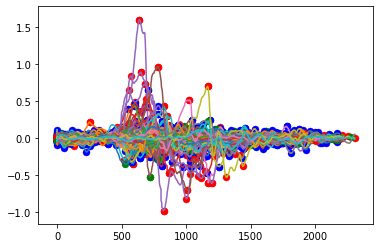

In [3]:
for i in onlyfiles:
    time=[]
    x=[]
    y=[]
    z=[]
    file=open(mypath+i)
    _=file.readline()
    lines=file.readlines()
    for j in lines:
        j=j.strip("\n")
        time.append(float(j.split(",")[0].strip("\"")))
        x.append(float(j.split(",")[1].strip("\"")))
        y.append(float(j.split(",")[2].strip("\"")))
        z.append(float(j.split(",")[3].strip("\"")))

#     plt.plot(time, x,label="x")
#     plt.plot(time, y,label="y")
#     plt.plot(time, z,label="z")

    xn = np.asarray(x)
    yn = np.asarray(y)
    zn = np.asarray(z)
    tn = np.asarray(time)

    x_max_index = argrelextrema(xn, np.greater, order=20)
    y_max_index = argrelextrema(yn, np.greater, order=20)
    z_max_index = argrelextrema(zn, np.greater, order=20)

    x_min_index = argrelextrema(xn, np.less, order=20)
    y_min_index = argrelextrema(yn, np.less, order=20)
    z_min_index = argrelextrema(zn, np.less, order=20)

    # print(min(x))
    # print(max(x))
    xyz=[]

    x1=list(x_max_index[0])
    x2=list(x_min_index[0])
    # print(x_max_index[0])
    # xmid=time[x1[int(len(x1)/2)]]
    x1.append(x.index(max(x)))
    x1.append(x.index(min(x)))
    x1.extend(x2)
    xyz.extend(x1)
    x1.sort()
    x_max_index=np.asarray(x1)

    y1=list(y_max_index[0])
    y2=list(y_min_index[0])
    y1.append(y.index(max(y)))
    y1.append(y.index(min(y)))
    y1.extend(y2)
    xyz.extend(y1)
    y1.sort()
    y_max_index=np.asarray(y1)
#     print(y_max_index)

    z1=list(z_max_index[0])
    z2=list(z_min_index[0])
    z1.append(z.index(max(z)))
    z1.append(z.index(min(z)))
    z1.extend(z2)
    xyz.extend(z1)
    z1.sort()
    z_max_index=np.asarray(z1)

    xyz.sort()
    xmid=time[xyz[int(len(xyz)/2)]]
    keydt=i.rfind("_")+4
    keyut=i.rfind("&")+1
    keydt=int(i[keydt:keyut-1])
    keyut=int(i[keyut:-4])
    print(i,xmid-100,xmid-100-keydt,keyut-keydt)

    newname=i[:i.rfind("_")+4]+str(int(xmid-100))+".csv"
    # print(newname)
    copyfile(mypath+i, newpath+newname)
#     plt.scatter(xmid-100,0,linewidth=0.3, s=100, c='black', alpha=1)
#     plt.scatter(keydt,0,linewidth=0.3, s=100, c='gray', alpha=1)
#     plt.scatter(tn[x_max_index],xn[x_max_index],linewidth=0.3, s=50, c='blue')
#     plt.scatter(tn[y_max_index],yn[y_max_index],linewidth=0.3, s=50, c='red')
#     plt.scatter(tn[z_max_index],zn[z_max_index],linewidth=0.3, s=50, c='green')
    # plt.scatter(tn[x_min_index[0]],xn[x_min_index[0]],linewidth=0.3, s=50, c='r')
#     plt.xlabel("time")
#     plt.ylabel("coords") 
#     plt.title(i) 
#     plt.legend()
#     plt.show()